In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv(r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


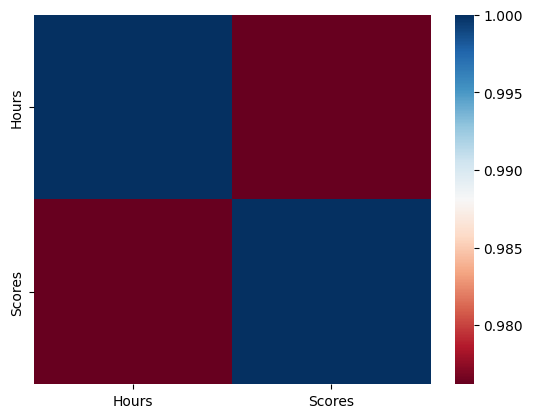

In [13]:
metrics=df.corr()
sns.heatmap(metrics,cmap="RdBu") #inferno
plt.show()

the correlation is : 0.9761906560220887


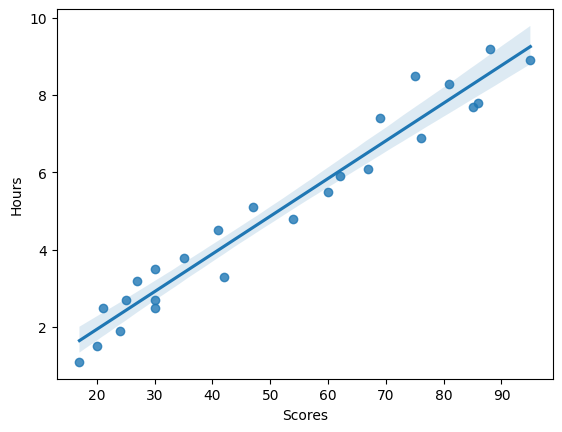

In [17]:
sns.regplot(x=df["Scores"],y=df["Hours"])
print("the correlation is :",df["Scores"].corr(df["Hours"]))

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_squared_error

# Linear regression

In [24]:
x=df[["Hours"]]
y=df["Scores"]
x_train,x_test,y_train,y_test=train_test_split(df[["Hours"]],df["Scores"],test_size=0.2,random_state=42)

In [31]:
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print(r2_score(y_test,predicted))
print("the equation is :", model.coef_[0],"*x+",model.intercept_)

0.9678055545167994
the equation is : 9.682078154455697 *x+ 2.826892353899737


In [35]:
print("THE SCORE will be if you studied 9.25 HRS/DAY ",model.predict([[9.25]]))

THE SCORE will be if you studied 9.25 HRS/DAY  [92.38611528]


C:\Users\USER\anaconda3\envs\hamza\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Ridge Regression

In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split

In [46]:
param1=[{"alpha":[0.001,0.0001,0.01,0.1,0.2,0.5,1]}]
rr=Ridge()
grid1=GridSearchCV(rr,param1,cv=4,scoring='neg_mean_squared_error')
grid1.fit(x_train, y_train)
best_alpha = grid1.best_params_['alpha']
best_ridge_mo=Ridge(alpha=best_alpha)
best_ridge_mo.fit(x_train,y_train)
predicted=best_ridge_mo.predict(x_test)
print(r2_score(y_test,predicted))

0.9669930313719547


In [49]:
print("THE SCORE will be if you studied 9.25 HRS/DAY ",best_ridge_mo.predict([[9.25]]))

THE SCORE will be if you studied 9.25 HRS/DAY  [92.0569547]


C:\Users\USER\anaconda3\envs\hamza\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
